In [44]:
# importing nacessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# loading dataset
try: 
    df = pd.read_csv('IRIS.csv', encoding='latin-1')
except UnicodeDecodeError as e :
    print(f'UnicodeDecodeError{e}')
# printing some rows of dataset
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# describing dataset's atributes
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [47]:
# checking information abourt dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
# checking null values in dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

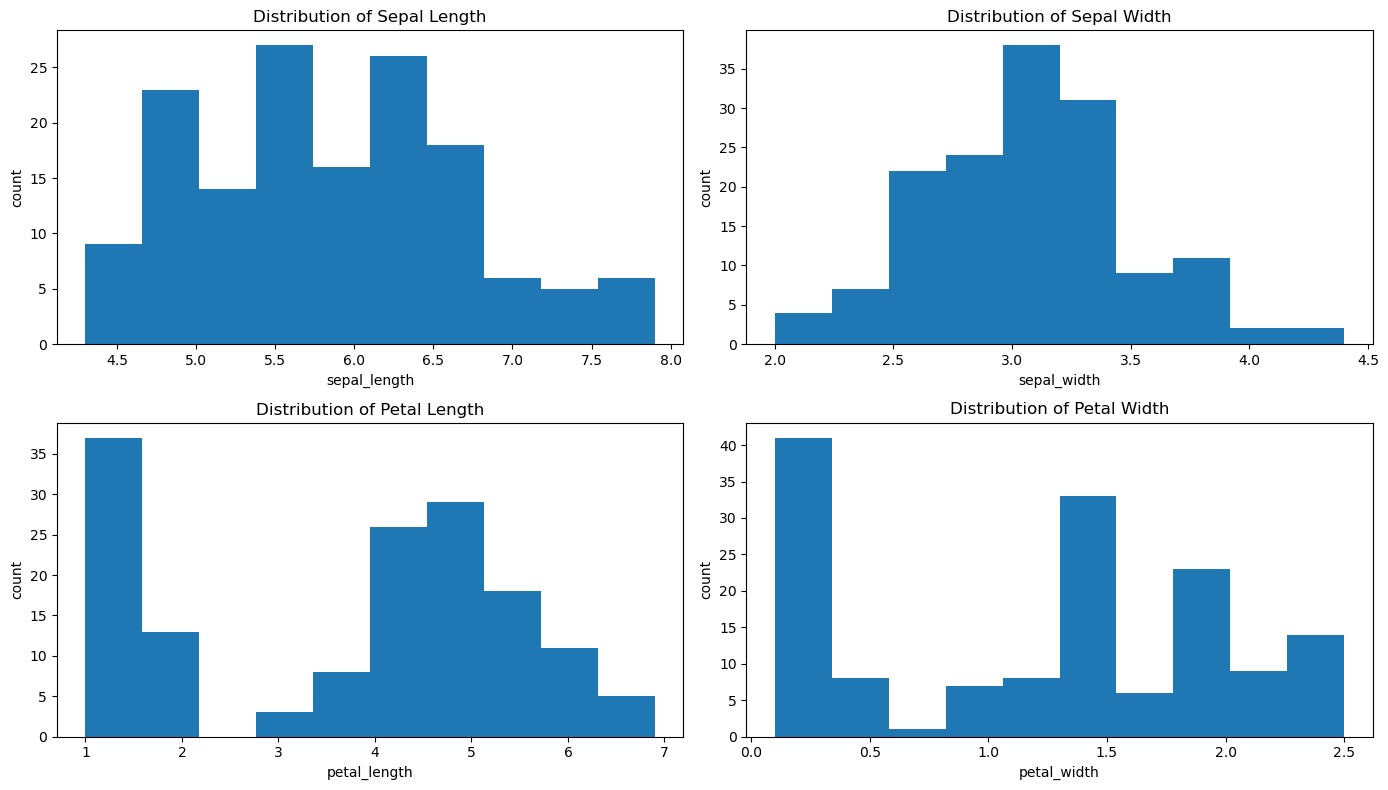

In [49]:
# visualizing relationship between all columns of dataset
plt.figure(figsize=(14,8))

# Subplot 1: Distribution of Sepal Length
plt.subplot(2, 2, 1)
plt.hist(df['sepal_length'])
plt.xlabel('sepal_length')
plt.ylabel('count')
plt.title('Distribution of Sepal Length')

# Subplot 2: Distribution of Sepal Width
plt.subplot(2, 2, 2)
plt.hist(df['sepal_width'])
plt.xlabel('sepal_width')
plt.ylabel('count')
plt.title('Distribution of Sepal Width')

# Subplot 3: Distribution of Petal Length
plt.subplot(2, 2, 3)
plt.hist(df['petal_length'])
plt.xlabel('petal_length')
plt.ylabel('count')
plt.title('Distribution of Petal Length')

# Subplot 4: Distribution of Petal Width
plt.subplot(2, 2, 4)
plt.hist(df['petal_width'])
plt.xlabel('petal_width')
plt.ylabel('count')
plt.title('Distribution of Petal Width')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

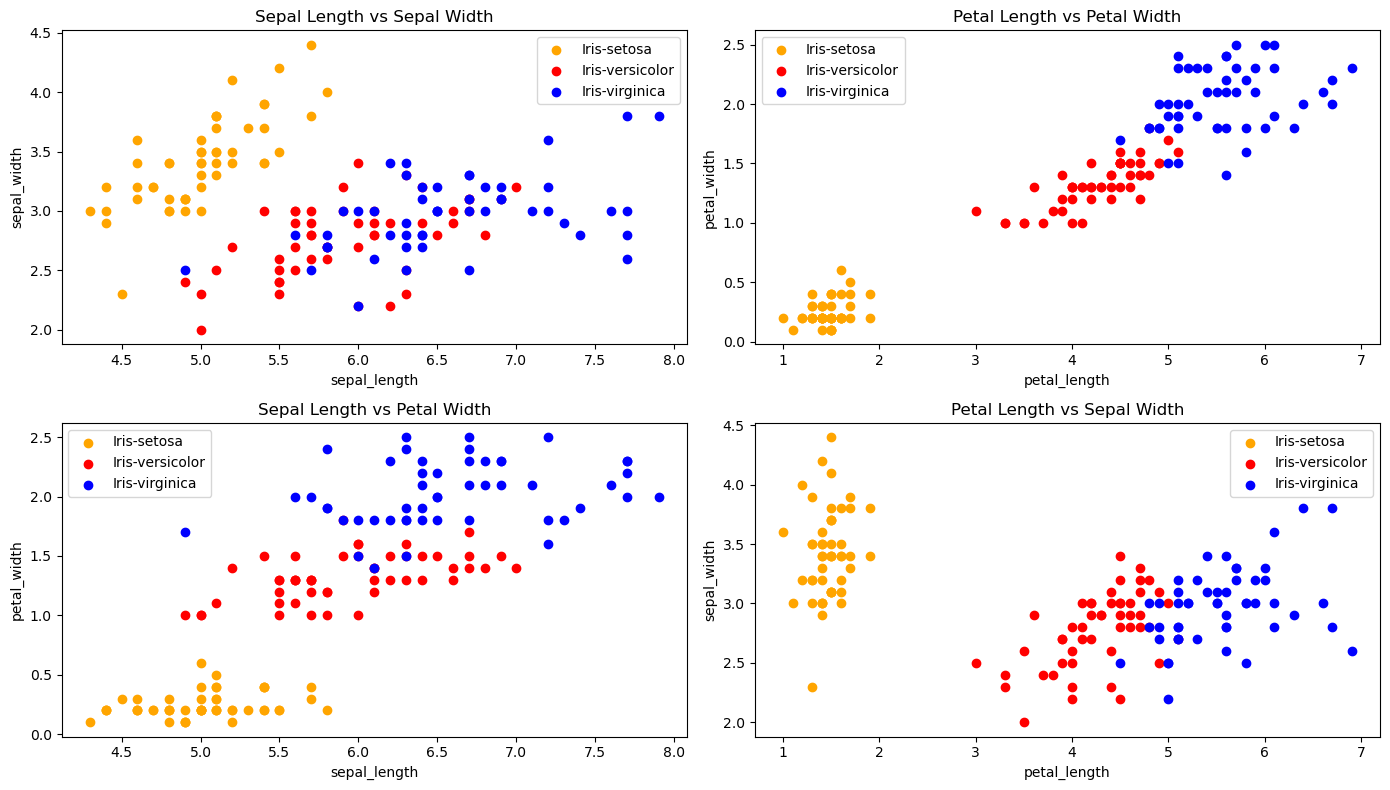

In [50]:
# Define colors for each species
color = ['orange', 'red', 'blue']

# Define species names
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Create a new figure with a specified size
plt.figure(figsize=(14,8))

# Subplot 1: Sepal Length vs Sepal Width
plt.subplot(2, 2, 1)

# Iterate over each species
for i in range(3):
    # Select data points for the current species
    x = df[df['species'] == species[i]]
    # Scatter plot for sepal length vs sepal width
    plt.scatter(x['sepal_length'], x['sepal_width'], c=color[i], label=species[i])
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

# Subplot 2: Petal Length vs Petal Width
plt.subplot(2, 2, 2)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=color[i], label=species[i])
plt.title('Petal Length vs Petal Width')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

# Subplot 3: Sepal Length vs Petal Width
plt.subplot(2, 2, 3)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_width'], c=color[i], label=species[i])
plt.title('Sepal Length vs Petal Width')
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.legend()

# Subplot 4: Petal Length vs Sepal Width
plt.subplot(2, 2, 4)
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['sepal_width'], c=color[i], label=species[i])
plt.title('Petal Length vs Sepal Width')
plt.xlabel('petal_length')
plt.ylabel('sepal_width')
plt.legend()

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

In [51]:
# calculating correlation of dataset
num_df = df.select_dtypes(include=['float64', 'int64'])
num_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


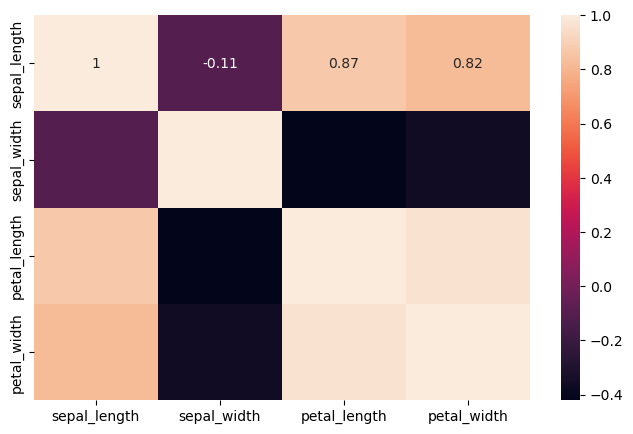

In [52]:
# Calculate the correlation matrix
corr_met = num_df.corr()
fig, ax = plt.subplots(figsize=(8,5))

# Plot the heatmap with correlation matrix
sns.heatmap(corr_met, annot=True, ax=ax)

# Rotate the x-axis labels for better readability
# plt.xticks(rotation=90)

plt.show()

In [53]:
# Import necessary libraries for trans forming catogorical data
from sklearn.preprocessing import LabelEncoder

# transforming data of species
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'].values)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splitng dataset for taining model and predict the target variable
X = df.drop(columns=['species'])
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [55]:
# Import necessary libraries for regression model 
from sklearn.linear_model import LogisticRegression

# fiting model on data and predicting the target variable
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 93.33


D:\Installed Software\Anaconda 3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
# Import necessary libraries for KNN model
from sklearn.neighbors import KNeighborsClassifier

# fiting model on data and predicting the target variable
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 93.33


In [57]:
# Import necessary libraries for decision tree
from sklearn.tree import DecisionTreeClassifier

# fiting model on data and predicting the target variable
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}")

Accuracy: 93.33


In [58]:
# Import necessary libraries for Support Vector Machines
from sklearn.svm import SVC, LinearSVC

# fiting model on data and predicting the target variable
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy * 100: .2f}')

Accuracy :  97.78
